In [1]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/9/electricity_train.csv')
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.425556,6,0.723404,0.076258,0.311366,0.003467,0.422915,0.414912,1
1,0.867351,7,0.808511,0.028131,0.299018,0.001838,0.325738,0.832018,0
2,0.031680,1,0.723404,0.055242,0.398691,0.003467,0.422915,0.414912,0
3,0.867793,3,1.000000,0.028822,0.396162,0.001014,0.394873,0.639474,0
4,0.880536,4,0.978723,0.040741,0.468908,0.002655,0.425427,0.630702,1
...,...,...,...,...,...,...,...,...,...
36244,0.447281,2,0.723404,0.087096,0.845879,0.006061,0.687209,0.327632,1
36245,0.429583,7,0.425532,0.058034,0.372657,0.003467,0.422915,0.414912,0
36246,0.013053,5,0.468085,0.041732,0.558465,0.003467,0.422915,0.414912,0
36247,0.889739,3,0.872340,0.078179,0.730586,0.005393,0.599171,0.476754,1


In [3]:
np.round(df['class'].sum() / df['class'].count(), 3)

0.425

<Axes: >

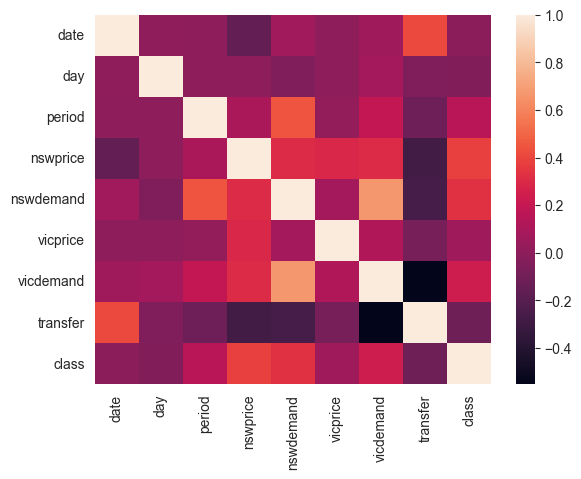

In [11]:
sns.heatmap(df.corr())

In [10]:
abs(df.corr())

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
date,1.000000,0.005840,0.001577,0.153561,0.067692,0.002110,0.057239,0.405853,0.003827
day,0.005840,1.000000,0.000416,0.003168,0.052946,0.001082,0.076904,0.053012,0.046841
period,0.001577,0.000416,1.000000,0.105341,0.444579,0.022706,0.192153,0.115437,0.154224
nswprice,0.153561,0.003168,0.105341,1.000000,0.306982,0.288349,0.304492,0.274764,0.386071
nswdemand,0.067692,0.052946,0.444579,0.306982,1.000000,0.083510,0.667174,0.264476,0.331741
vicprice,0.002110,0.001082,0.022706,0.288349,0.083510,1.000000,0.125489,0.081112,0.065630
vicdemand,0.057239,0.076904,0.192153,0.304492,0.667174,0.125489,1.000000,0.552870,0.231569
transfer,0.405853,0.053012,0.115437,0.274764,0.264476,0.081112,0.552870,1.000000,0.119576
class,0.003827,0.046841,0.154224,0.386071,0.331741,0.065630,0.231569,0.119576,1.000000


<Axes: ylabel='Count'>

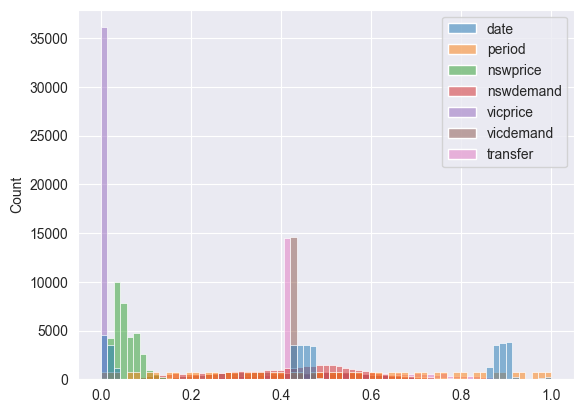

In [15]:
sns.histplot(df.drop(['day', 'class'], axis=1))

<Axes: xlabel='transfer', ylabel='Count'>

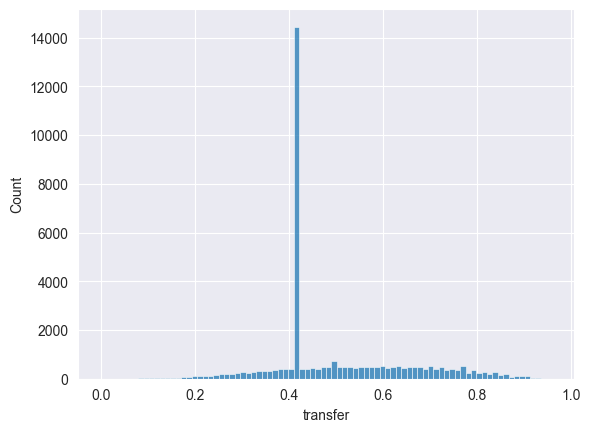

In [18]:
sns.histplot(df['transfer'])

# Task 2

In [25]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


def split_dataset(dataset: pd.DataFrame, column: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    return dataset.drop(column, axis=1), dataset[column]


def get_report_on_train(dataset, label: str = 'class'):
    X, Y = split_dataset(dataset, label)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

    classifier = RandomForestClassifier(random_state=11)
    classifier.fit(X_train, Y_train)
    Y_predicted = classifier.predict(X_train)

    return classification_report(Y_train, Y_predicted, digits=3)

In [26]:
print(get_report_on_train(df))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     16668
           1      1.000     1.000     1.000     12331

    accuracy                          1.000     28999
   macro avg      1.000     1.000     1.000     28999
weighted avg      1.000     1.000     1.000     28999


In [27]:
X, Y = split_dataset(df, 'class')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [28]:
from sklearn.model_selection import GridSearchCV

params_grid = {'n_estimators': [100, 300, 500],
  'max_leaf_nodes': list(range(6, 10)),
  'min_samples_leaf': [1, 2, 3]}

cv = GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=11),
    params_grid,
    verbose=4,
    n_jobs=10,
    cv=3)
cv.fit(X_train, Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=11),
             n_jobs=10,
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

In [29]:
cv.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 100}

In [30]:
classifier = cv.best_estimator_
classifier.fit(X_train, Y_train)
Y_predicted = classifier.predict(X_train)

print(classification_report(Y_train, Y_predicted, digits=3))

              precision    recall  f1-score   support

           0      0.778     0.878     0.825     16668
           1      0.800     0.662     0.724     12331

    accuracy                          0.786     28999
   macro avg      0.789     0.770     0.775     28999
weighted avg      0.787     0.786     0.782     28999


In [31]:
Y_predicted = classifier.predict(X_test)

print(classification_report(Y_test, Y_predicted, digits=3))

              precision    recall  f1-score   support

           0      0.784     0.873     0.826      4192
           1      0.794     0.671     0.727      3058

    accuracy                          0.788      7250
   macro avg      0.789     0.772     0.777      7250
weighted avg      0.788     0.788     0.784      7250


In [34]:
cv.best_estimator_.feature_importances_

array([0.05483919, 0.01220557, 0.0846421 , 0.52198611, 0.14880906,
       0.12889253, 0.04004573, 0.00857972])

# Task 3

In [38]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(voting='hard', estimators=[
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=11)),
    ('SVC', SVC(random_state=11)),
    ('SGD', SGDClassifier(random_state=11))
])

voting.fit(X_train, Y_train)
Y_predicted = voting.predict(X_test)

print(classification_report(Y_test, Y_predicted, digits=3))

              precision    recall  f1-score   support

           0      0.751     0.875     0.808      4192
           1      0.778     0.602     0.679      3058

    accuracy                          0.760      7250
   macro avg      0.765     0.739     0.744      7250
weighted avg      0.762     0.760     0.754      7250


# Task 4

In [41]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

classifier = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, 
    max_features=0.5,
    bootstrap=False,
  random_state=11)

classifier.fit(X_train, Y_train)
Y_predicted = classifier.predict(X_test)

print(classification_report(Y_test, Y_predicted, digits=3))

              precision    recall  f1-score   support

           0      0.859     0.911     0.885      4192
           1      0.868     0.796     0.830      3058

    accuracy                          0.863      7250
   macro avg      0.864     0.854     0.857      7250
weighted avg      0.863     0.863     0.862      7250


# Task 5

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=11, max_depth=2)
classifier.fit(X_train, Y_train)
Y_predicted = classifier.predict(X_test)

print(classification_report(Y_test, Y_predicted, digits=3))

              precision    recall  f1-score   support

           0      0.884     0.895     0.889      4192
           1      0.853     0.839     0.846      3058

    accuracy                          0.871      7250
   macro avg      0.869     0.867     0.868      7250
weighted avg      0.871     0.871     0.871      7250


# Task 6

In [43]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=11)
classifier.fit(X_train, Y_train)
Y_predicted = classifier.predict(X_test)

print(classification_report(Y_test, Y_predicted, digits=3))

C:\Users\Quarter\PycharmProjects\MLCourse\venv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0      0.928     0.903     0.915      4192
           1      0.872     0.904     0.888      3058

    accuracy                          0.903      7250
   macro avg      0.900     0.903     0.901      7250
weighted avg      0.904     0.903     0.904      7250


# Task 7

In [44]:
from sklearn.ensemble import StackingClassifier

classifier = StackingClassifier(estimators=[
    ('Random Forest', RandomForestClassifier(random_state=11)),
    ('SVC', SVC(random_state=11))
], final_estimator=LogisticRegression(random_state=11))
classifier.fit(X_train, Y_train)
Y_predicted = classifier.predict(X_test)

print(classification_report(Y_test, Y_predicted, digits=3))

              precision    recall  f1-score   support

           0      0.913     0.921     0.917      4192
           1      0.891     0.880     0.885      3058

    accuracy                          0.904      7250
   macro avg      0.902     0.901     0.901      7250
weighted avg      0.904     0.904     0.904      7250
